Loading the dataset , finding percentage of missing values and handling outliers on data without feature scaling and also initial plot of frequenccy graphs

Categorical Features: ['Date', 'type', 'region']
Numerical Features: ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

Percentage of missing values in categorical features:
Date      0.0
type      0.0
region    0.0
dtype: float64

Percentage of missing values in numerical features:
Unnamed: 0      0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
year            0.0
dtype: float64


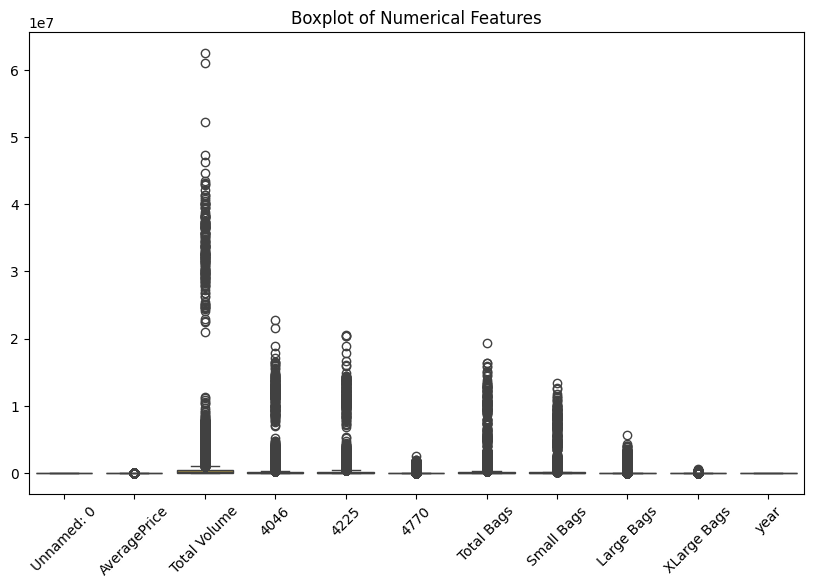

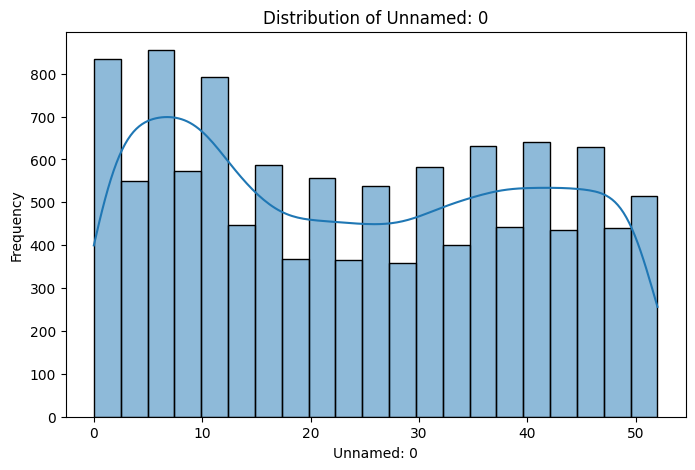

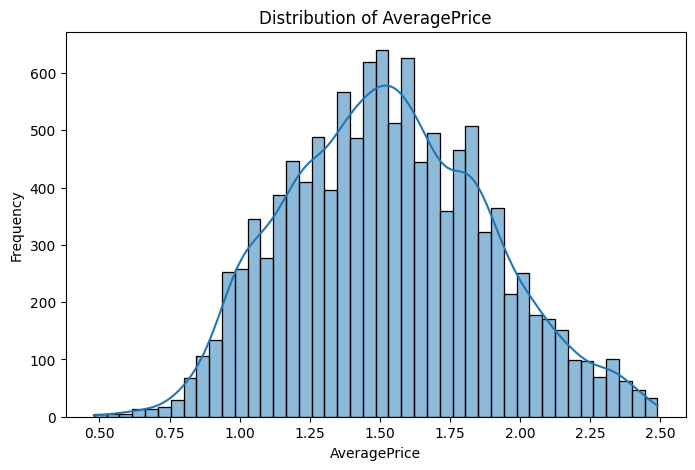

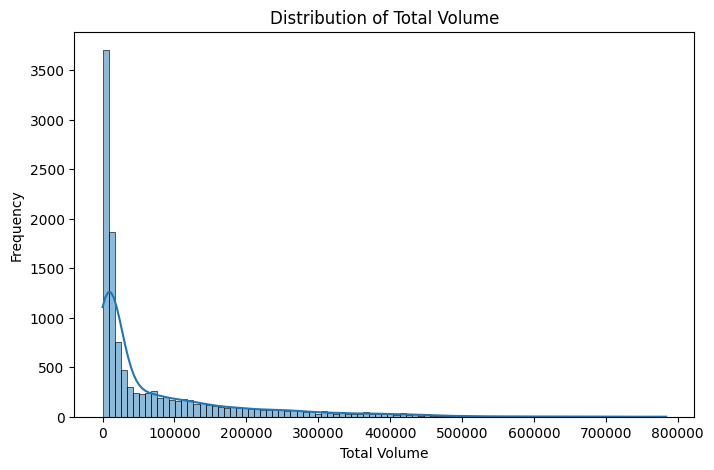

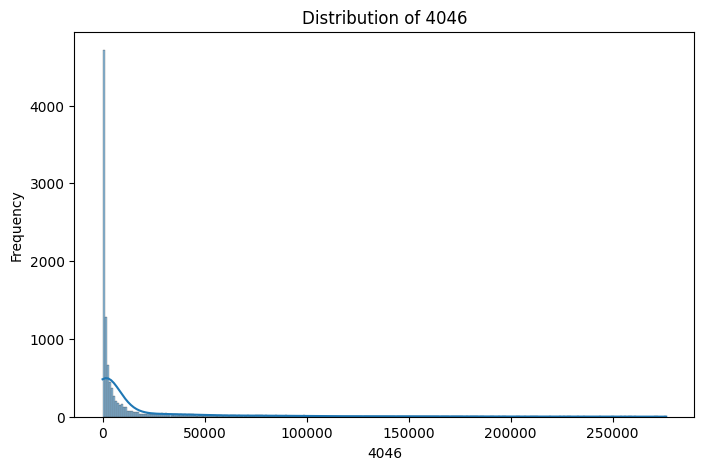

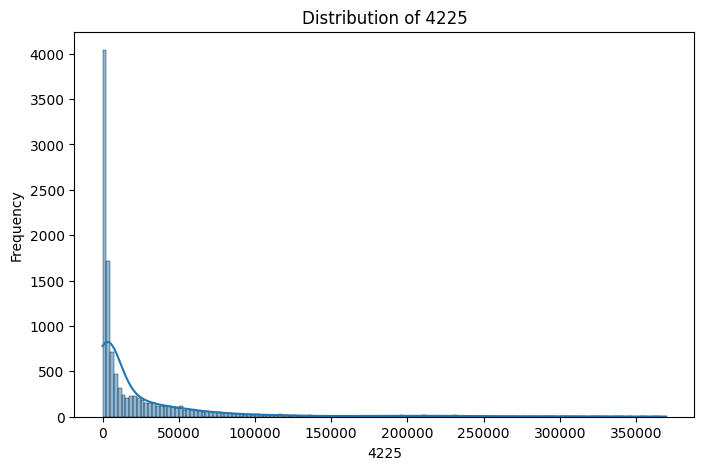

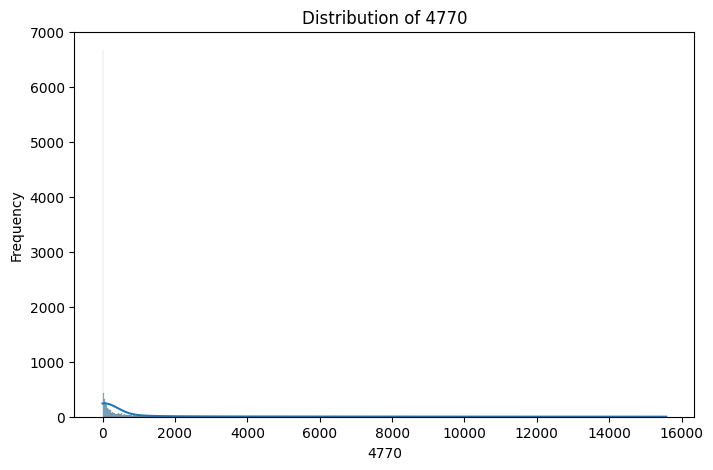

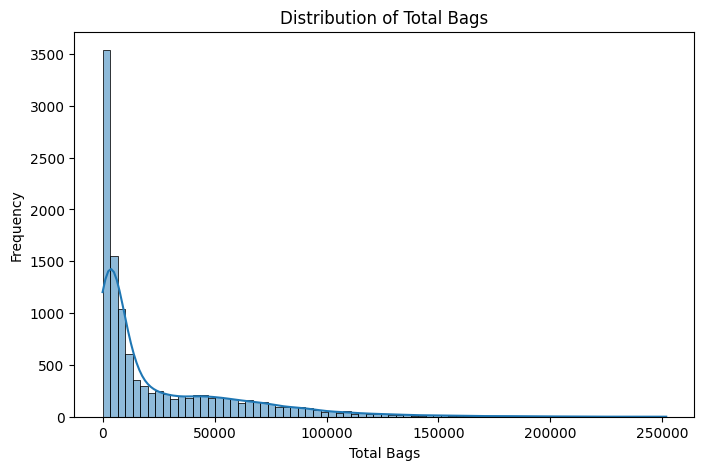

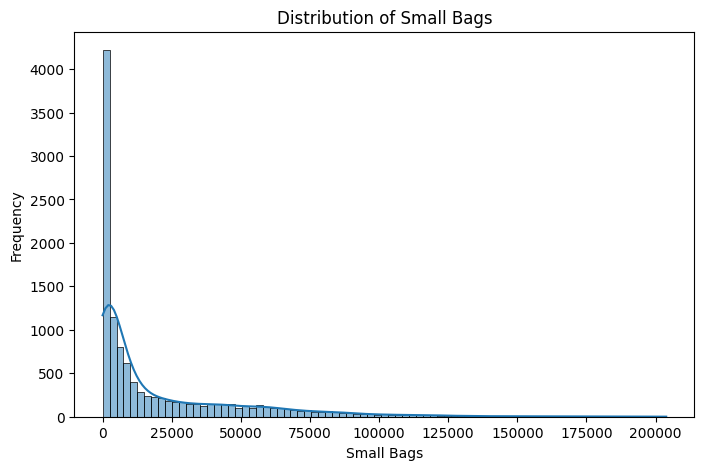

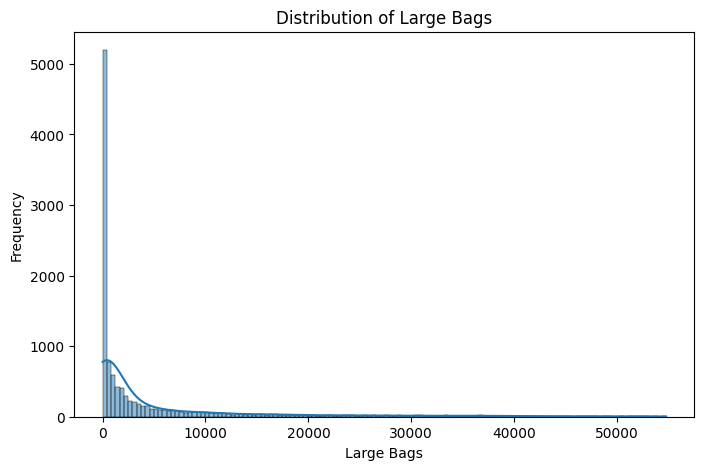

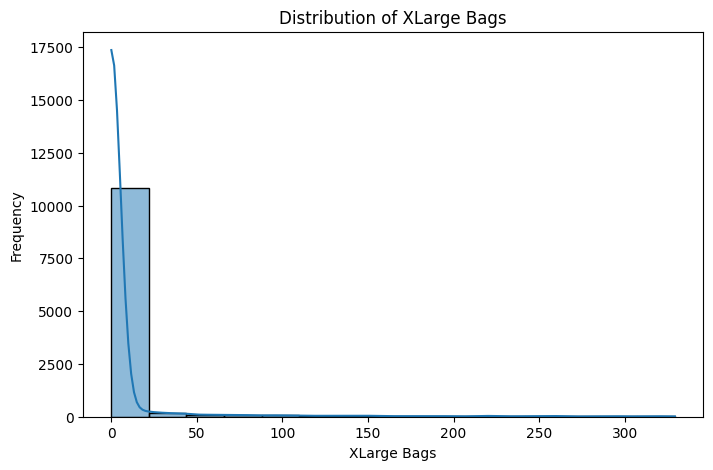

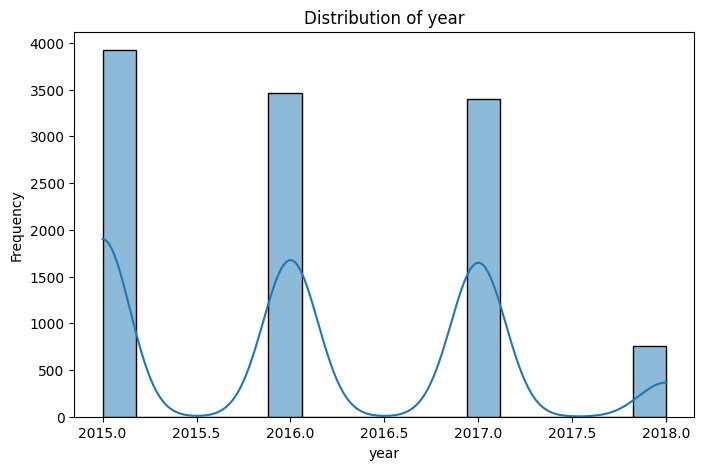

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("avocado.csv")  

# List the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Identify the percentage of missing values
missing_categorical = df[categorical_features].isnull().mean() * 100
missing_numerical = df[numerical_features].isnull().mean() * 100

print("\nPercentage of missing values in categorical features:")
print(missing_categorical)
print("\nPercentage of missing values in numerical features:")
print(missing_numerical)

# Examine the spread of numerical data and identify outliers using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Handle outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Distribution plot
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

Filling numerical datas with null values using mean .

In [2]:
#THIS IS WITH NORMALIZATION 
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the dataset
dataset = pd.read_csv('avocado.csv')

# Handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
imputer.fit(dataset[numerical_columns])
dataset[numerical_columns] = imputer.transform(dataset[numerical_columns])

# Encoding categorical data
labelencoder = LabelEncoder()
dataset['type'] = labelencoder.fit_transform(dataset['type'])

# One-hot encode the 'region' column
onehotencoder = OneHotEncoder(sparse=False)
region_encoded = onehotencoder.fit_transform(dataset['region'].values.reshape(-1,1))
region_encoded_df = pd.DataFrame(region_encoded, columns = [f"region_{i}" for i in range(region_encoded.shape[1])])
dataset = pd.concat([dataset, region_encoded_df], axis=1)
dataset.drop(['region'], axis=1, inplace=True)

# Splitting the dataset into independent and dependent variables
X = dataset.drop(columns=['Unnamed: 0', 'Date', 'AveragePrice'])
Y = dataset['AveragePrice']

# Splitting the dataset into the Training set and Test set
X_train, X_test, _, _ = train_test_split(X, Y, test_size=0.2, random_state=1)

# Feature scaling
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.transform(X_test)

# Save preprocessed training data
X_train_preprocessed = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_train_preprocessed.to_csv('X_train_preprocessed.csv', index=False)

# Save preprocessed testing data
X_test_preprocessed = pd.DataFrame(X_test_standard, columns=X_test.columns)
X_test_preprocessed.to_csv('X_test_preprocessed.csv', index=False)

print("Preprocessed data saved successfully!")


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

THIS IS WITH ONE HOT ENCODING TOO MANY COLUMNS

In [ ]:
#THIS IS WITH ONE HOT ENCODING TOO MANY COLUMNS

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Read the dataset
dataset = pd.read_csv('avocado.csv')

# Handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
imputer.fit(dataset[numerical_columns])
dataset[numerical_columns] = imputer.transform(dataset[numerical_columns])

# Encoding categorical data
labelencoder = LabelEncoder()
dataset['type'] = labelencoder.fit_transform(dataset['type'])

# One-hot encode the 'region' column
onehotencoder = OneHotEncoder(sparse=False)
region_encoded = onehotencoder.fit_transform(dataset['region'].values.reshape(-1,1))
region_encoded_df = pd.DataFrame(region_encoded, columns = [f"region_{i}" for i in range(region_encoded.shape[1])])
dataset = pd.concat([dataset, region_encoded_df], axis=1)
dataset.drop(['region'], axis=1, inplace=True)

# Splitting the dataset into independent and dependent variables
X = dataset.drop(columns=['Unnamed: 0', 'Date', 'AveragePrice'])
Y = dataset['AveragePrice']

# Splitting the dataset into the Training set and Test set
X_train, X_test, _, _ = train_test_split(X, Y, test_size=0.2, random_state=1)

# Save preprocessed training data
X_train_preprocessed = pd.DataFrame(X_train, columns=X_train.columns)
X_train_preprocessed.to_csv('X_train_preprocessed.csv', index=False)

# Save preprocessed testing data
X_test_preprocessed = pd.DataFrame(X_test, columns=X_test.columns)
X_test_preprocessed.to_csv('X_test_preprocessed.csv', index=False)

print("Preprocessed data saved successfully!")


c:\Users\sraad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocessed data saved successfully!


THIS IS WITH NUMERICAL ASSINGMENT INSTEAD OF ONE HOT Encoding

In [ ]:
#THIS IS WITH NUMERICAL ASSINGMENT INSTEAD OF ONE HOT 
# THIS IS THE FINAL

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Read the dataset
dataset = pd.read_csv('avocado.csv')

# Handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
imputer.fit(dataset[numerical_columns])
dataset[numerical_columns] = imputer.transform(dataset[numerical_columns])

# # Get unique values in the 'region' column
# unique_regions = dataset['region'].unique()

# # Create a dictionary to map each region to a numerical label
# region_dict = {region: i for i, region in enumerate(unique_regions)}

# # Replace region names with numerical labels in the 'region' column
# dataset['region'] = dataset['region'].map(region_dict)

# Convert 'Date' column to integer representation
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].dt.year * 10000 + dataset['Date'].dt.month * 100 + dataset['Date'].dt.day

# Splitting the dataset into independent and dependent variables
X = dataset.drop(columns=['Unnamed: 0'])
Y = dataset['AveragePrice']

# Splitting the dataset into the Training set and Test set
X_train, X_test, _, _ = train_test_split(X, Y, test_size=0.2, random_state=1)

# Save preprocessed training data
X_train_preprocessed = pd.DataFrame(X_train, columns=X_train.columns)
X_train_preprocessed.to_csv('X_train_preprocessed_avo.csv', index=False)

# Save preprocessed testing data
X_test_preprocessed = pd.DataFrame(X_test, columns=X_test.columns)
X_test_preprocessed.to_csv('X_test_preprocessed_avo.csv', index=False)

print("Preprocessed data saved successfully!")


Preprocessed data saved successfully!


Displaying outliers in dataset without using feature scaling.

Also display other query graphs related to data exploration.
The following are considered:

•	year vs total volume
•	region vs total 
•	small bags vs year 
•	small bags vs region
•	large bags vs year 
•	large bags vs region
•	xlarge bags vs year 
•	xlarge bags vs region
•	avg price vs year 
•	avg price vs region 



Categorical Features: ['type', 'region']
Numerical Features: ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

Percentage of missing values in categorical features:
type      0.0
region    0.0
dtype: float64

Percentage of missing values in numerical features:
Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
year            0.0
dtype: float64


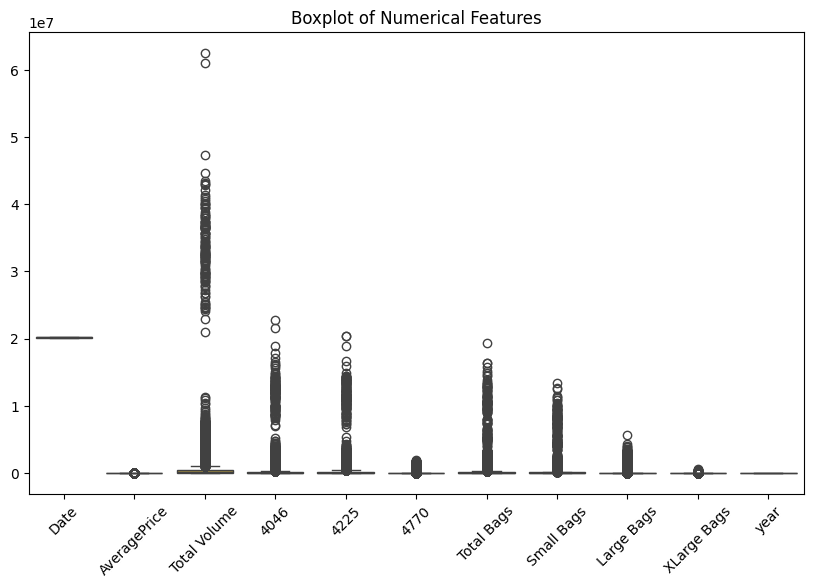

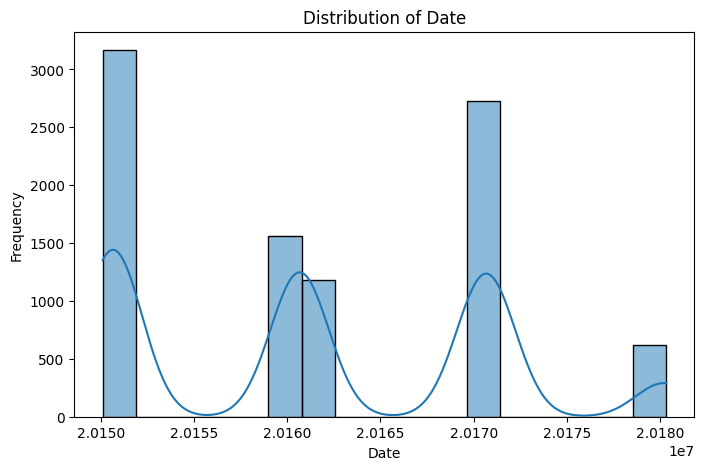

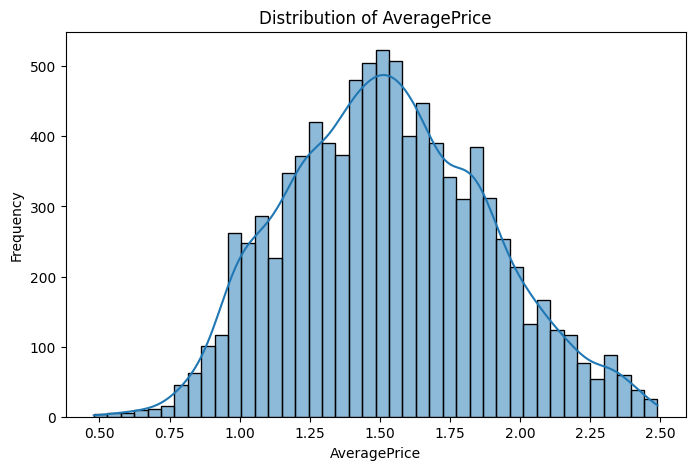

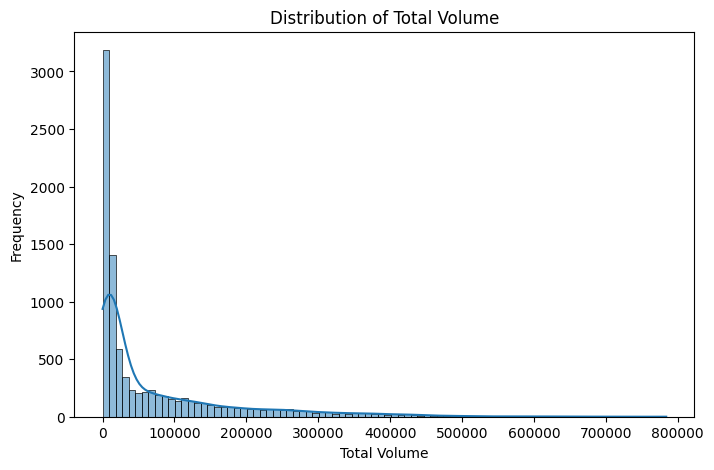

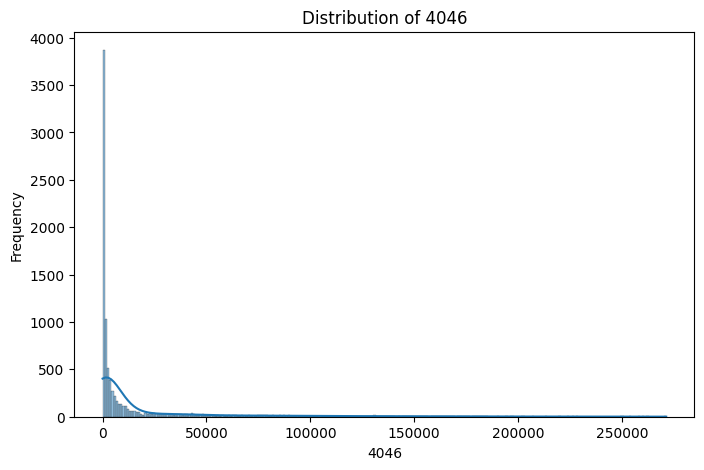

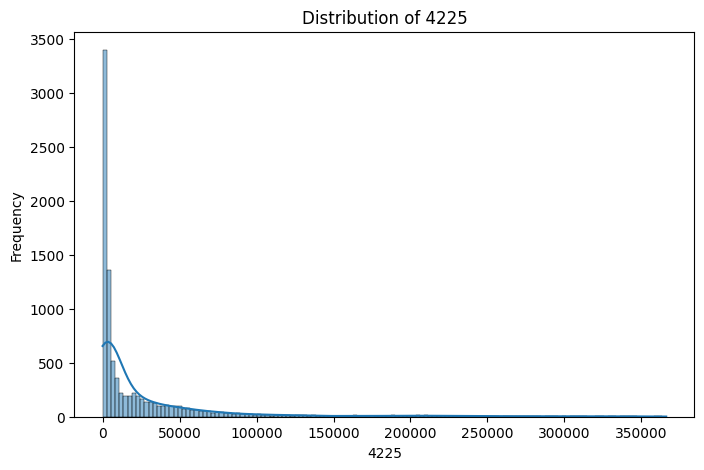

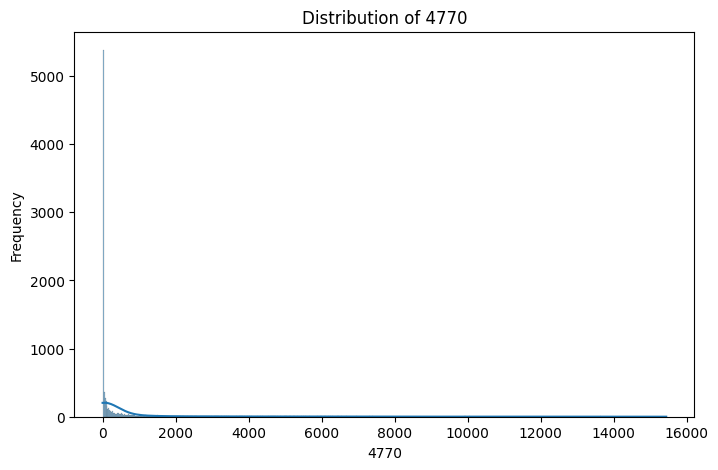

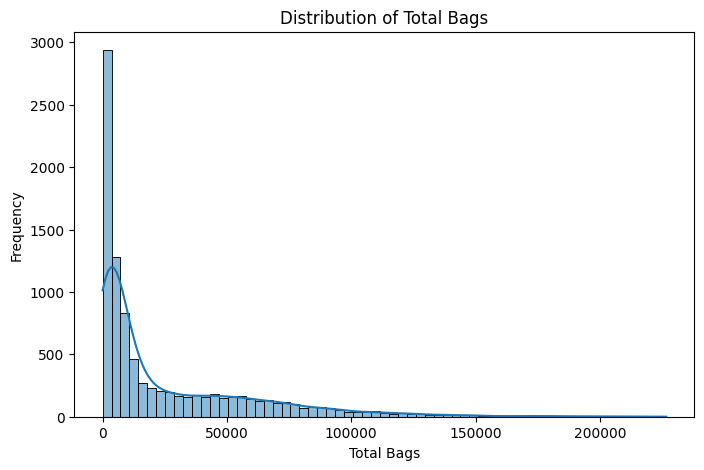

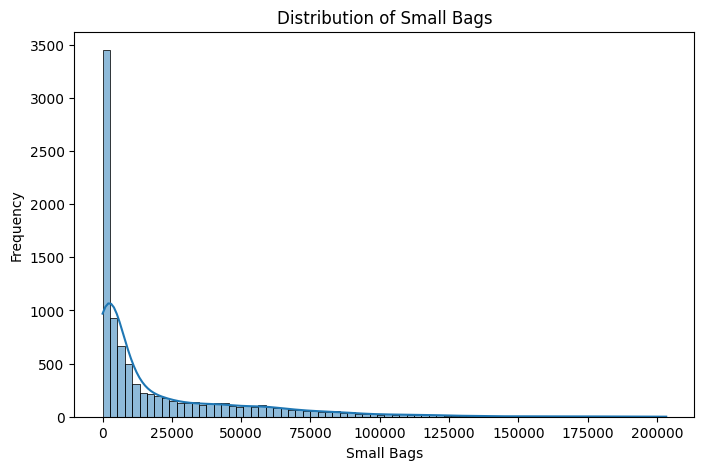

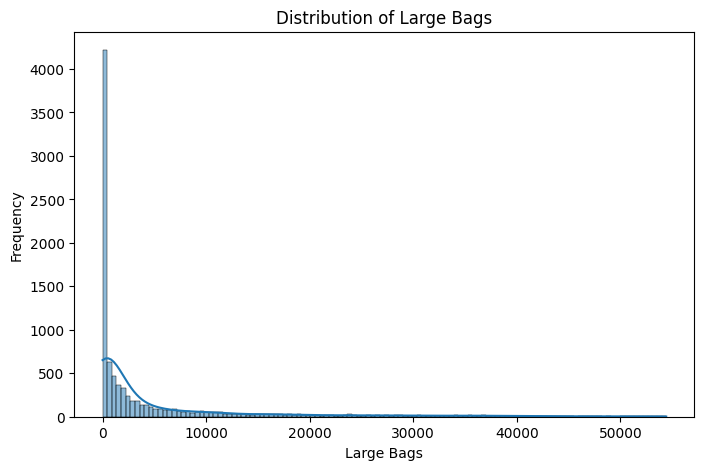

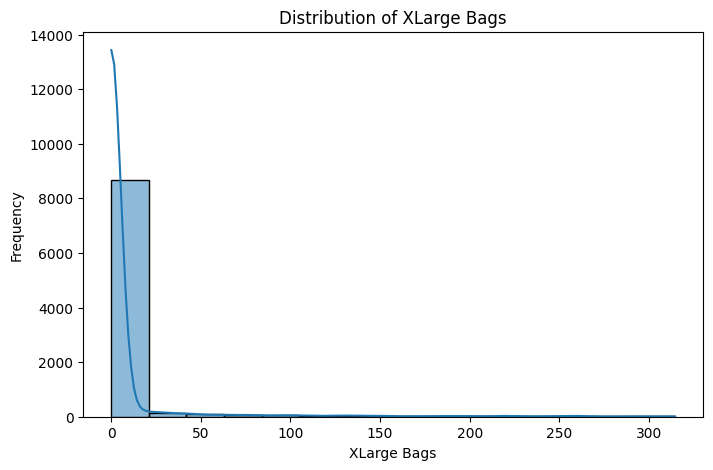

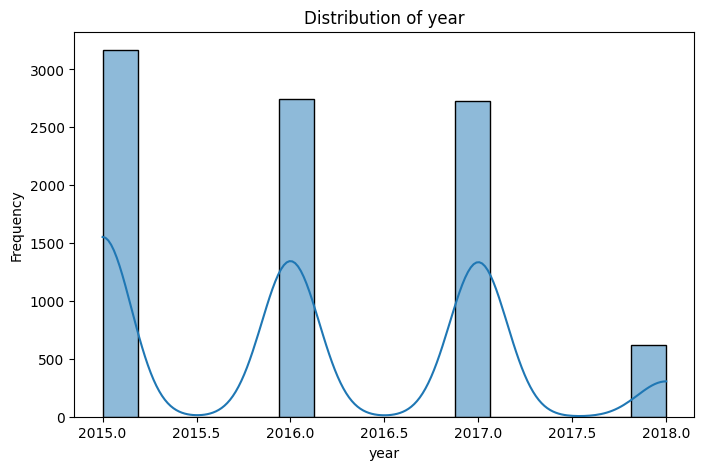

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_year, x='year', y='Total Volume', palette='viridis')


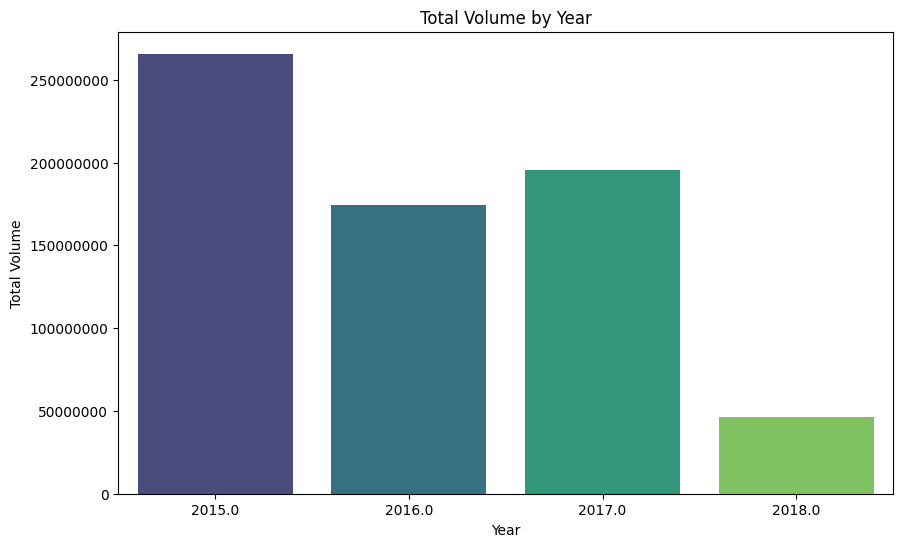

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_region, x='region', y='Total Volume', palette='viridis')


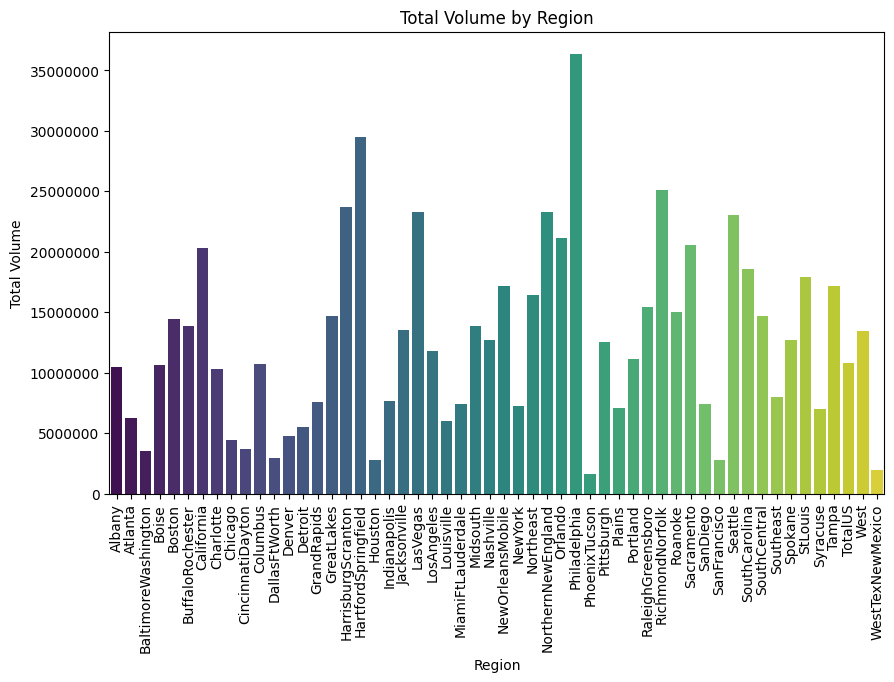

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=small_by_year, x='year', y='Small Bags', palette='viridis')


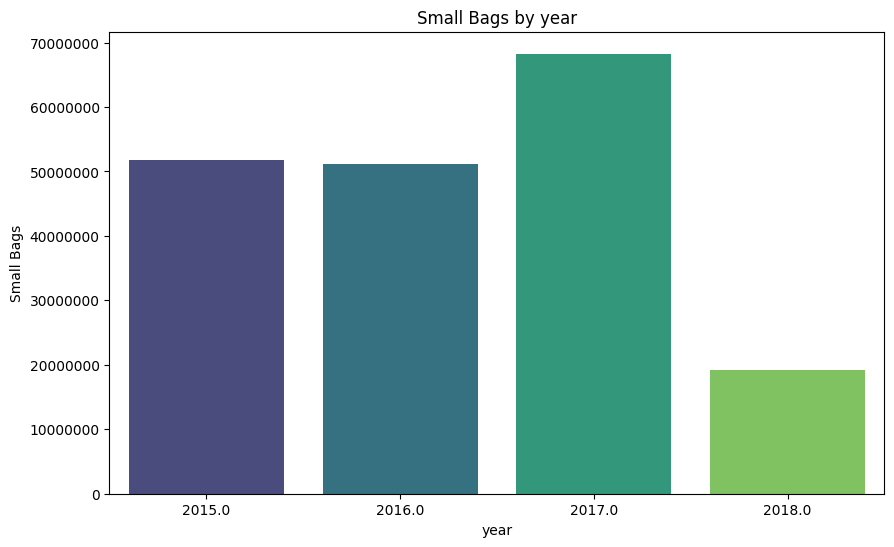

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=small_by_region, x='region', y='Small Bags', palette='viridis')


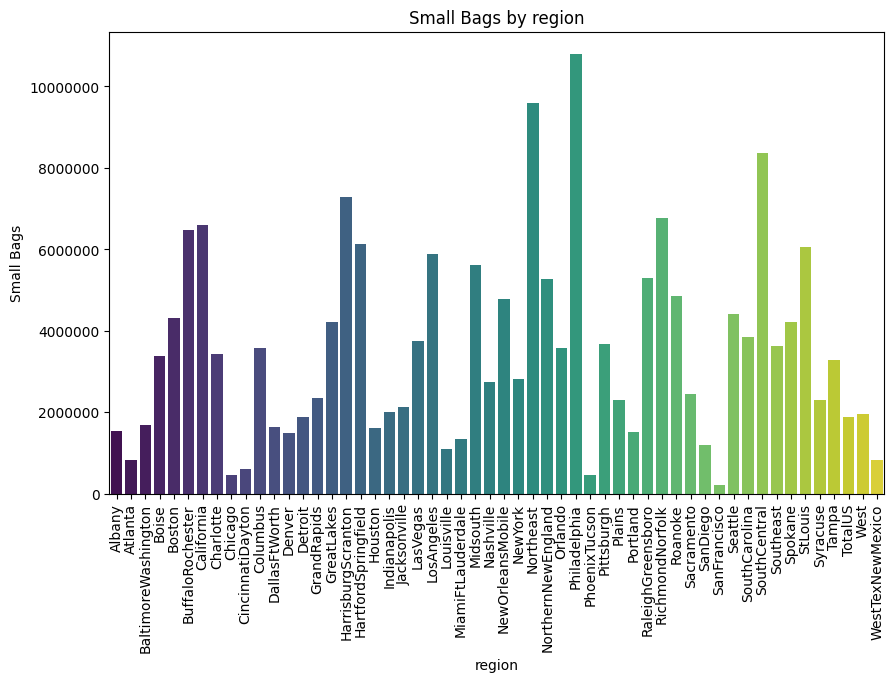

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=large_by_year, x='year', y='Large Bags', palette='viridis')


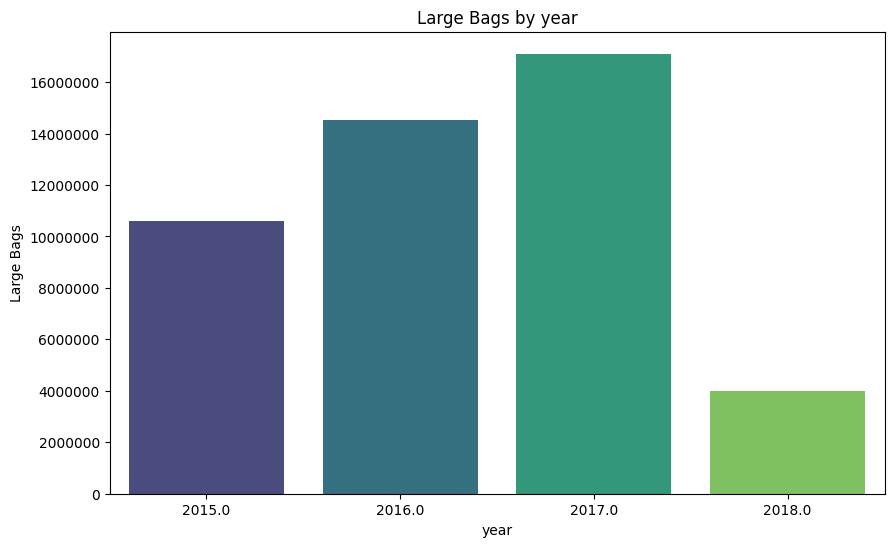

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=large_by_region, x='region', y='Large Bags', palette='viridis')


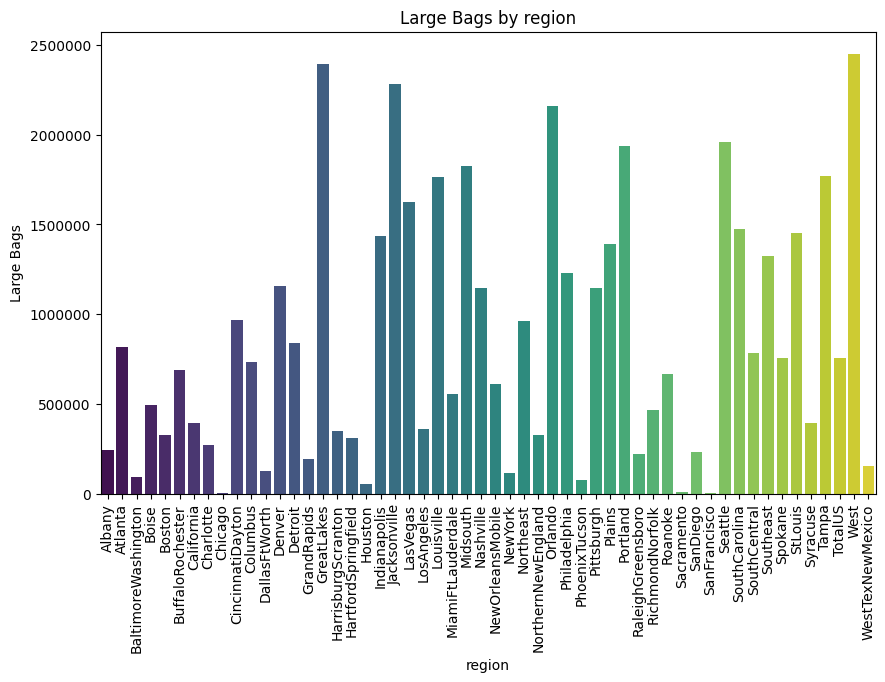

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xlarge_by_year, x='year', y='XLarge Bags', palette='viridis')


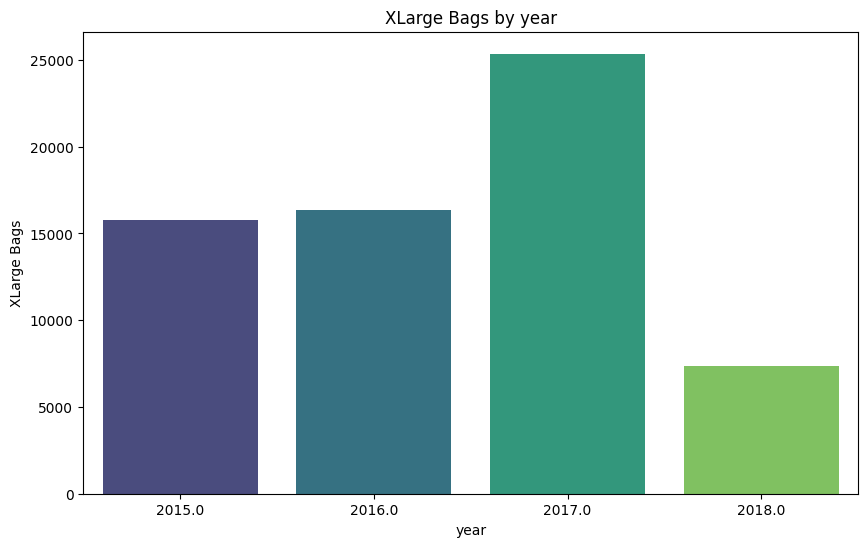

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xlarge_by_region, x='region', y='XLarge Bags', palette='viridis')


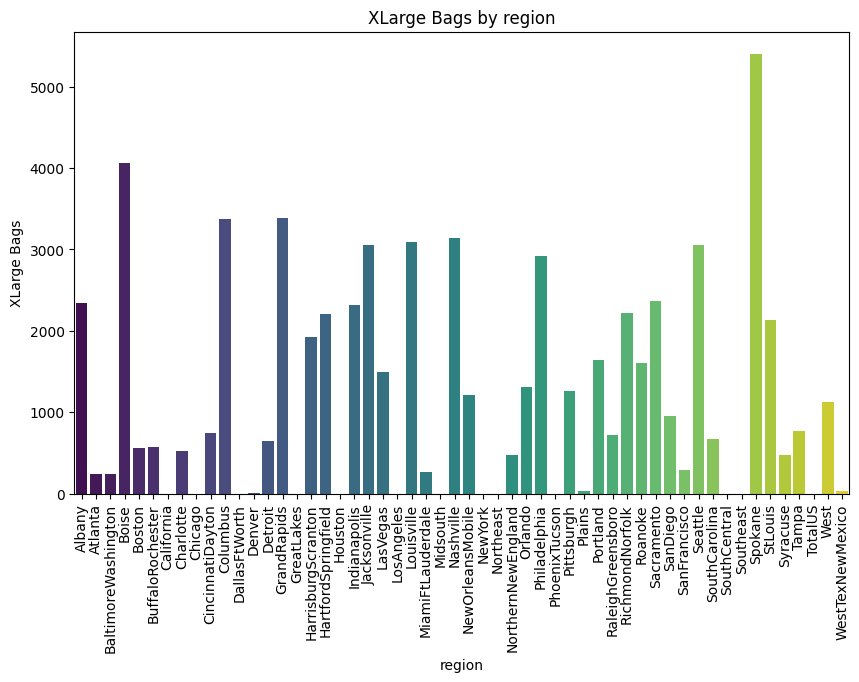

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_by_year, x='year', y='AveragePrice', palette='viridis')


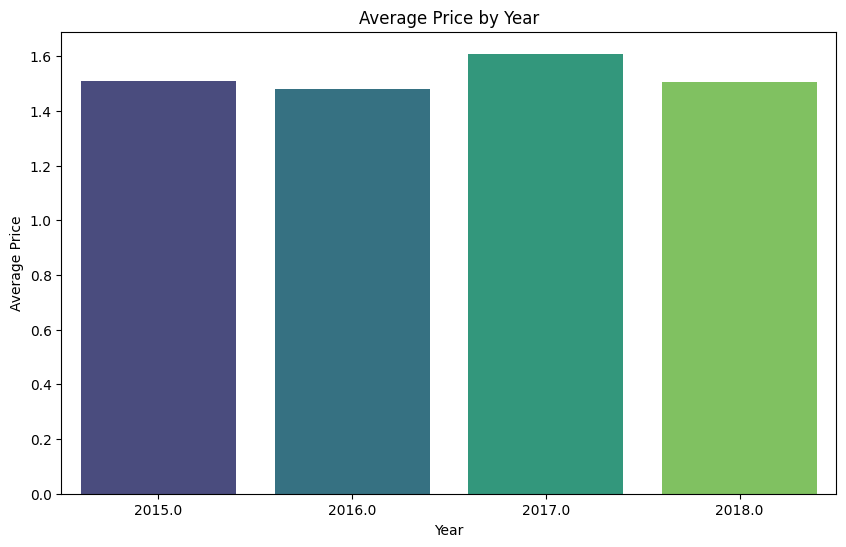

C:\Users\sraad\AppData\Local\Temp\ipykernel_5824\442738929.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_by_region, x='region', y='AveragePrice', palette='viridis')


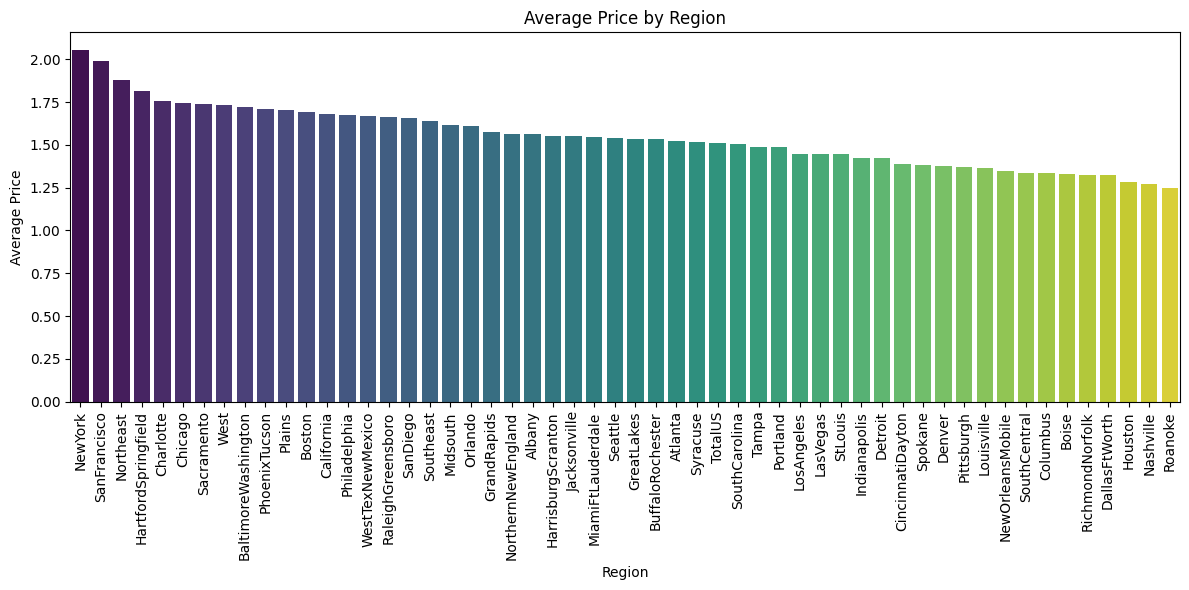

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("X_train_preprocessed_avo.csv")  

# List the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Identify the percentage of missing values
missing_categorical = df[categorical_features].isnull().mean() * 100
missing_numerical = df[numerical_features].isnull().mean() * 100

print("\nPercentage of missing values in categorical features:")
print(missing_categorical)
print("\nPercentage of missing values in numerical features:")
print(missing_numerical)

# Examine the spread of numerical data and identify outliers using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Handle outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Distribution plot
for feature in numerical_features:
     plt.figure(figsize=(8, 5))
     sns.histplot(df_cleaned[feature], kde=True)
     plt.title(f"Distribution of {feature}")
     plt.xlabel(feature)
     plt.ylabel("Frequency")
     plt.show()

# Aggregate total volume for each year
volume_by_year = df_cleaned.groupby('year')['Total Volume'].sum().reset_index()

# Bar chart of total volume by year
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_by_year, x='year', y='Total Volume', palette='viridis')
plt.title("Total Volume by Year")
plt.xlabel("Year")
plt.ylabel("Total Volume")
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks without scientific notation
plt.show()
####
volume_by_region = df_cleaned.groupby('region')['Total Volume'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_by_region, x='region', y='Total Volume', palette='viridis')
plt.title("Total Volume by Region")
plt.xlabel("Region")
plt.ylabel("Total Volume")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks without scientific notation
plt.show()
####
small_by_year = df_cleaned.groupby('year')['Small Bags'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=small_by_year, x='year', y='Small Bags', palette='viridis')
plt.title("Small Bags by year")
plt.xlabel("year")
plt.ylabel("Small Bags")
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks without scientific notation
plt.show()
####
small_by_region = df_cleaned.groupby('region')['Small Bags'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=small_by_region, x='region', y='Small Bags', palette='viridis')
plt.title("Small Bags by region")
plt.xlabel("region")
plt.ylabel("Small Bags")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks without scientific notation
plt.show()
###
large_by_year = df_cleaned.groupby('year')['Large Bags'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=large_by_year, x='year', y='Large Bags', palette='viridis')
plt.title("Large Bags by year")
plt.xlabel("year")
plt.ylabel("Large Bags")
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks without scientific notation
plt.show()
####
large_by_region = df_cleaned.groupby('region')['Large Bags'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=large_by_region, x='region', y='Large Bags', palette='viridis')
plt.title("Large Bags by region")
plt.xlabel("region")
plt.ylabel("Large Bags")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks without scientific notation
plt.show()
###
xlarge_by_year = df_cleaned.groupby('year')['XLarge Bags'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=xlarge_by_year, x='year', y='XLarge Bags', palette='viridis')
plt.title("XLarge Bags by year")
plt.xlabel("year")
plt.ylabel("XLarge Bags")
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks without scientific notation
plt.show()
####
xlarge_by_region = df_cleaned.groupby('region')['XLarge Bags'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=xlarge_by_region, x='region', y='XLarge Bags', palette='viridis')
plt.title("XLarge Bags by region")
plt.xlabel("region")
plt.ylabel("XLarge Bags")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis ticks without scientific notation
plt.show()
####

# Aggregate average price for each year
average_price_by_year = df_cleaned.groupby('year')['AveragePrice'].mean().reset_index()

# Bar chart of average price by year
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_year, x='year', y='AveragePrice', palette='viridis')
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()
####

# Aggregate average price for each region
average_price_by_region = df_cleaned.groupby('region')['AveragePrice'].mean().reset_index()

# Sort regions by average price
average_price_by_region = average_price_by_region.sort_values(by='AveragePrice', ascending=False)

# Bar chart of average price by region
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_by_region, x='region', y='AveragePrice', palette='viridis')
plt.title("Average Price by Region")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Using feature scaling now we will do the folowing below Read the dataset ->  Handling missing values (imputation) -> One-hot encode 'type' and 'region' columns -> Convert 'Date' column to datetime type -> Scale 'Date' column to be within the range with fit_transform -> Coversion of bool to 0/1 integer values -> Scaling all numerical values using MinMaxScaler() -> Remove 'Unnamed'/null columns -> Splitting the dataset into independent and dependent variables -> Splitting the dataset into the Training set and Test set -> Save preprocessed training and testing data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Read the dataset
dataset = pd.read_csv('avocado.csv')

# Handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
imputer.fit(dataset[numerical_columns])
dataset[numerical_columns] = imputer.transform(dataset[numerical_columns])

# One-hot encode 'type' and 'region' columns
dataset = pd.get_dummies(dataset, columns=['type', 'region'])

# Convert 'Date' column to datetime type
dataset['Date'] = pd.to_datetime(dataset['Date'])
boolean_columns = dataset.select_dtypes(include='bool').columns
dataset[boolean_columns] = dataset[boolean_columns].astype(int)

# Scale 'Date' column to be within the range 0 to 1
scaler = MinMaxScaler()
dataset['Date'] = scaler.fit_transform(dataset['Date'].values.reshape(-1, 1))

scaler = MinMaxScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Remove 'Unnamed' columns
dataset_encoded = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]

# Define features (X) and target variable (Y)
X = dataset_encoded.drop('AveragePrice', axis=1)
Y = dataset_encoded['AveragePrice']

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Save preprocessed training data
X_train.to_csv('avo2train.csv', index=False)

# Save preprocessed testing data
X_test.to_csv('avo2test.csv', index=False)

print("Preprocessed data saved successfully!")


Preprocessed data saved successfully!


Boxplotting to check for training data for various features for showing the distribution of numerical data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum. Checking for the outliers which are data points that fall far away from the other data points, usually above the top whisker or below the bottom whisker of the boxplot. They can indicate extreme values, errors, or variability in the data. In the below generated graph, there will be outliers visible as circles above several of the boxplots, indicating values that are significantly higher than the rest.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6b0c574-fedd-478d-8962-f9906858c78f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

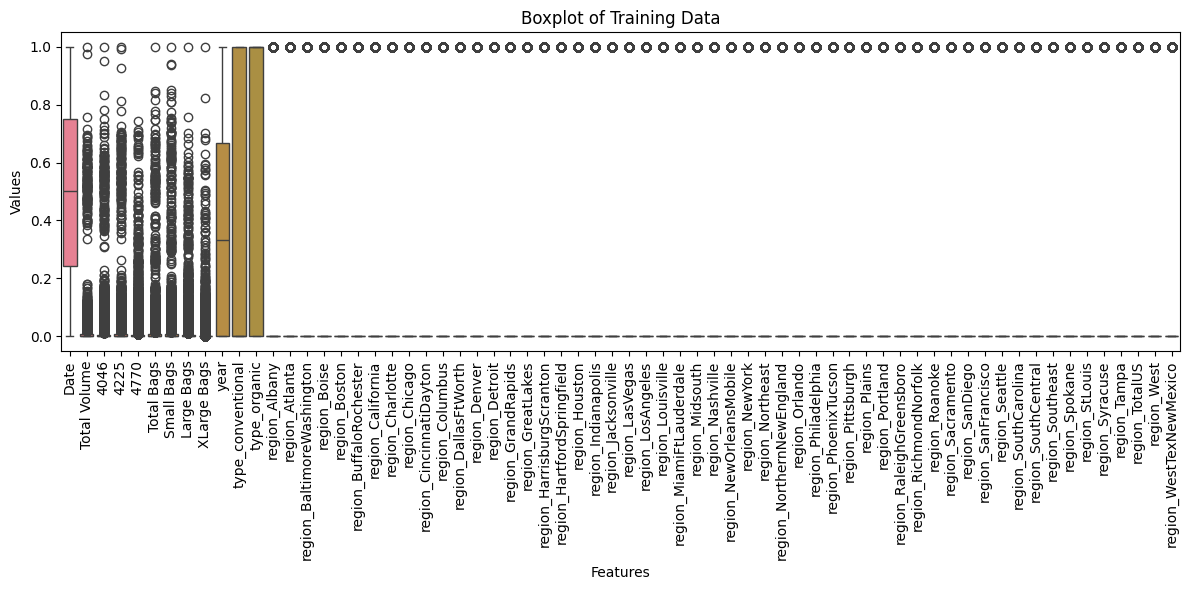

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed training data
X_train = pd.read_csv('avo2train.csv')

# Boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.title('Boxplot of Training Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


In the graph, The outliers in the boxplot are associated with the columns_to_remove_outliers = ['Total Volume', '4046', '4225', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']. These data points lie outside the main cluster and are represented by circles. So we will remove outliers associated with Total Volume column.

The values 0.25 and 0.75 correspond to the first quartile (Q1) and third quartile (Q3), respectively, in a dataset. Quartiles are statistical measures that divide a dataset into four equal parts, and they are often used in conjunction with the Interquartile Range (IQR) to identify and handle outliers.

Here's a brief explanation of the quartiles:

Q1 (First Quartile): The value below which 25% of the data falls. It is the 25th percentile of the dataset.

Q3 (Third Quartile): The value below which 75% of the data falls. It is the 75th percentile of the dataset.

The Interquartile Range (IQR) is the range between Q1 and Q3, representing the middle 50% of the data. It is calculated as follows:

                IQR=Q3−Q1

The use of 0.25 and 0.75 in the quantile function corresponds to Q1 and Q3, respectively. By calculating the IQR and defining a range around it (commonly 1.5 times the IQR), one can identify potential outliers in the dataset. This approach is known as the Tukey's fences method and is commonly used in statistical analysis to identify and handle outliers in a robust manner.

The lower and upper bounds for identifying outliers are set as values below Q1 - 1.5 * IQR and above Q3 + 1.5 * IQR, respectively. This is a common rule of thumb in the IQR method for identifying outliers.

Using boolean indexing, the function creates a boolean mask (outliers) that indicates whether each data point in the specified column is an outlier or not.

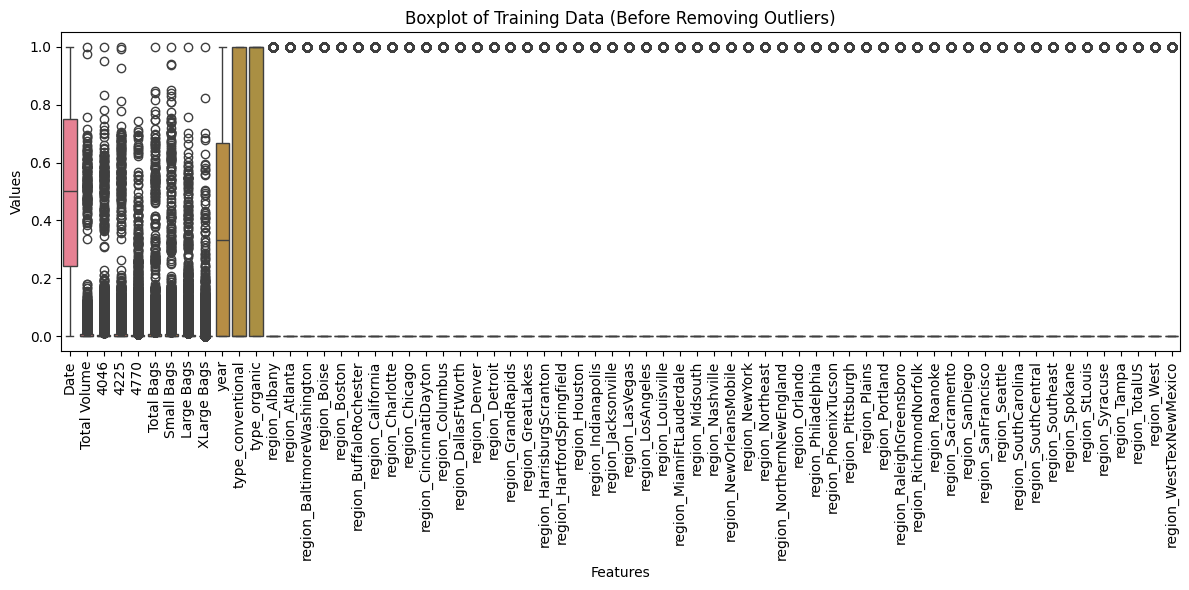

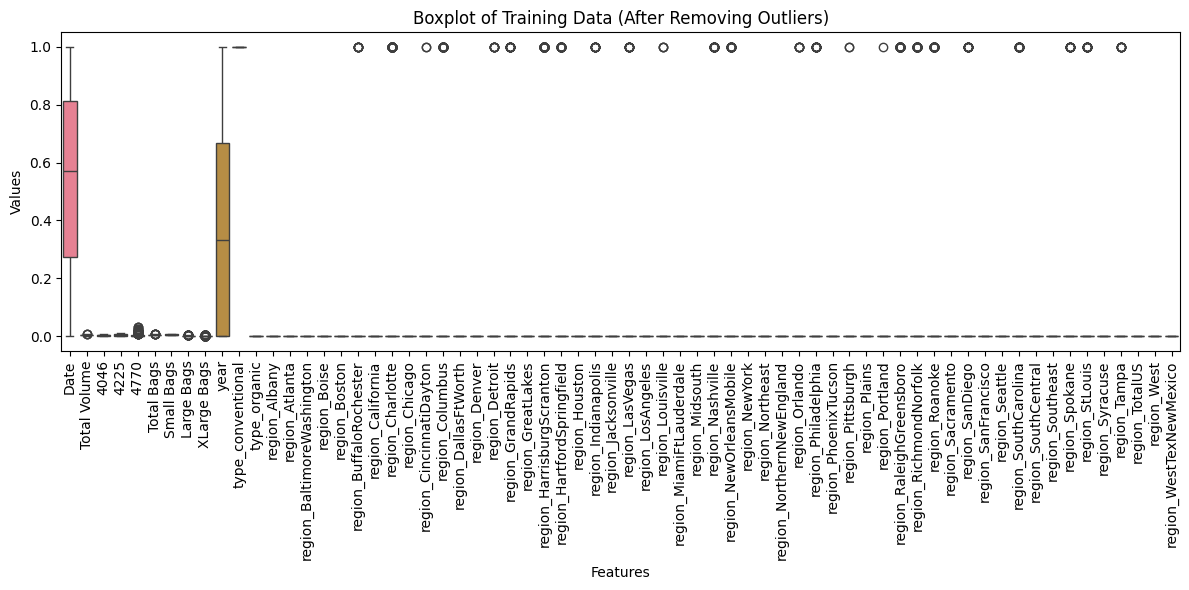

Preprocessed data with outliers removed saved successfully!


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed training data
X_train = pd.read_csv('avo2train.csv')

# Boxplot before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.title('Boxplot of Training Data (Before Removing Outliers)')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()
columns_to_remove_outliers = ['Total Volume', '4046', '4225', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','type_organic','type_conventional']
# Identify and remove outliers using modified IQR method for each specified column
def remove_outliers_custom_bounds(data, column, lower_bound, upper_bound):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_value = Q1 - lower_bound * IQR
    upper_bound_value = Q3 + upper_bound * IQR
    outliers = (data[column] < lower_bound_value) | (data[column] > upper_bound_value)
    data_cleaned = data[~outliers]
    return data_cleaned

# Set custom bounds for outlier removal
lower_bound = 0
upper_bound = 1

# Remove outliers using modified IQR method for each specified column
X_train_cleaned = X_train.copy()  # Create a copy to avoid modifying the original data
for column in columns_to_remove_outliers:
    X_train_cleaned = remove_outliers_custom_bounds(X_train_cleaned, column, lower_bound, upper_bound)

# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_cleaned)
plt.xticks(rotation=90)
plt.title('Boxplot of Training Data (After Removing Outliers)')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


# Save the preprocessed training data without outliers
X_train_cleaned.to_csv('avo2train_cleaned.csv', index=False)
print("Preprocessed data with outliers removed saved successfully!")


Thus the outliers are removed and the final data is obtained it is dispalyed as follows:

In [ ]:
X

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0.303571,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.297619,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.291667,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.285714,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.279762,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.958333,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
18245,0.952381,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
18246,0.946429,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
18247,0.940476,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
